# Init

In [30]:
import os; import pandas as pd; import numpy  as np
from pandas.tseries.offsets import *
import statsmodels.formula.api as smf
from IPython import display
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [ ]:
path = "../data/swisscom_csv/"
os.chdir(path)
from glob import glob

In [39]:
def load_file(file_name):
    df = pd.read_csv(file_name, parse_dates=['Date']).set_index('Date')
    for col in df.columns: 
        try:
            df[col] = df[col].apply(lambda x: str(x).replace("<20", "20")).astype(int)
        except:
            try:    df[col] = df[col].apply(lambda x: str(x).replace("<20", "20")).astype(float)
            except: df[col] = df[col].apply(lambda x: str(x).replace("<20", "20"))
              
    df.columns = [col.replace("Transport Mode: ","") for col in df.columns]
    df.columns = [col.replace("Reason: ","") for col in df.columns]
    return df

# Load Datasets

In [49]:
dfs = {}
for file_name in glob("*.csv"):
    df = load_file(file_name)
    print("\n\n" + file_name.replace(".csv", "") + " - {0:0,.0f} rows".format(len(df)))
    display(df.head(2))
    display(df.tail(2))
    dfs[file_name.replace(".csv", "")] = df.copy()
    print("🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶")



demographics_age - 49 rows


,<20 (%),20-40 (%),40-60 (%),60+ (%)
Date,,,,
2019-05-27,20.39,27.70,25.92,25.99
2019-05-28,20.35,27.63,25.98,26.03


,<20 (%),20-40 (%),40-60 (%),60+ (%)
Date,,,,
2019-07-13,20.58,27.51,26.56,25.36
2019-07-14,20.61,27.53,26.23,25.63


🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶


trips_destinations_passing_through_district - 4,514 rows


,District To Id,District To Name,Count
Date,,,
2019-05-27,101,Affoltern,110
2019-05-27,1850,Surselva,62


,District To Id,District To Name,Count
Date,,,
2019-07-14,2106,Mendrisio,44434
2019-07-14,-1,Other,434


🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶


trips_routes_passing_through_municipality - 490 rows


,Municipality From Id,Municipality From Name,Municipality To Id,Municipality To Name,Count
Date,,,,,
2019-05-27,5254,Mendrisio,5238,Monteceneri,495
2019-05-27,5226,Capriasca,5226,Capriasca,572


,Municipality From Id,Municipality From Name,Municipality To Id,Municipality To Name,Count
Date,,,,,
2019-07-14,5254,Mendrisio,5002,Bellinzona,1549
2019-07-14,1220,Wassen,5268,Vacallo,811


🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶


tripcount_hourly_withinarea - 1,176 rows


,Total,Train,Road,Highway,Commute,Non-commute
Date,,,,,,
2019-05-27 00:00:00,544,20,540,20,74,469
2019-05-27 01:00:00,235,20,234,20,35,199


,Total,Train,Road,Highway,Commute,Non-commute
Date,,,,,,
2019-07-14 22:00:00,1450,20,1448,20,155,1295
2019-07-14 23:00:00,1036,20,1035,20,99,937


🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶


trips_destinations_from_here_to_canton - 1,092 rows


,Canton To Id,Canton To Name,Count
Date,,,
2019-05-27,5,Schwyz,119
2019-05-27,10,Fribourg,50


,Canton To Id,Canton To Name,Count
Date,,,
2019-07-14,4,Uri,427
2019-07-14,-1,Other,51


🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶


trips_routes_passing_through_district - 490 rows


,District From Id,District From Name,District To Id,District To Name,Count
Date,,,,,
2019-05-27,2105,Lugano,2106,Mendrisio,7259
2019-05-27,2101,Bellinzona,2105,Lugano,3395


,District From Id,District From Name,District To Id,District To Name,Count
Date,,,,,
2019-07-14,2103,Leventina,2106,Mendrisio,4268
2019-07-14,2106,Mendrisio,2103,Leventina,2695


🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶


trips_origins_incoming_from_municipality - 6,198 rows


,Municipality From Id,Municipality From Name,Count
Date,,,
2019-05-27,5260,Novazzano,1326
2019-05-27,5131,Tenero-Contra,266


,Municipality From Id,Municipality From Name,Count
Date,,,
2019-07-14,5073,Giornico,31
2019-07-14,-1,Other,2344


🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶


tripcount_hourly_passingthrough - 1,176 rows


,Total,Train,Road,Highway,Commute,Non-commute
Date,,,,,,
2019-05-27 00:00:00,1008,30,281,696,52,956
2019-05-27 01:00:00,440,20,117,314,20,419


,Total,Train,Road,Highway,Commute,Non-commute
Date,,,,,,
2019-07-14 22:00:00,2180,79,850,1251,84,2096
2019-07-14 23:00:00,1199,26,483,689,28,1170


🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶


trips_routes_passing_through_plz - 490 rows


,PLZ From Id,PLZ From Name,PLZ To Id,PLZ To Name,Count
Date,,,,,
2019-05-27,6850,Mendrisio,6467,Schattdorf,210
2019-05-27,6982,Agno,6982,Agno,530


,PLZ From Id,PLZ From Name,PLZ To Id,PLZ To Name,Count
Date,,,,,
2019-07-14,6776,Quinto,6830,Chiasso,684
2019-07-14,6500,Bellinzona,6830,Chiasso,644


🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶


trips_destinations_passing_through_plz - 15,637 rows


,PLZ To Id,PLZ To Name,Count
Date,,,
2019-05-27,7304,Maienfeld,74
2019-05-27,6979,Lugano,111


,PLZ To Id,PLZ To Name,Count
Date,,,
2019-07-14,6722,Acquarossa,30
2019-07-14,-1,Other,6713


🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶


trips_origins_passing_through_municipality - 11,256 rows


,Municipality From Id,Municipality From Name,Count
Date,,,
2019-05-27,1501,Beckenried,52
2019-05-27,1024,Emmen,57


,Municipality From Id,Municipality From Name,Count
Date,,,
2019-07-14,3296,Sargans,34
2019-07-14,-1,Other,5656


🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶


trips_origins_passing_through_canton - 1,265 rows


,Canton From Id,Canton From Name,Count
Date,,,
2019-05-27,5,Schwyz,335
2019-05-27,10,Fribourg,54


,Canton From Id,Canton From Name,Count
Date,,,
2019-07-14,15,Appenzell Ausserrhoden,95
2019-07-14,-1,Other,12


🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶


trips_destinations_from_here_to_district - 2,694 rows


,District To Id,District To Name,Count
Date,,,
2019-05-27,2104,Locarno,4419
2019-05-27,24,Neuchâtel,49


,District To Id,District To Name,Count
Date,,,
2019-07-14,2106,Mendrisio,13874
2019-07-14,-1,Other,643


🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶


trips_origins_incoming_from_plz - 10,014 rows


,PLZ From Id,PLZ From Name,Count
Date,,,
2019-05-27,6979,Lugano,35
2019-05-27,6855,Stabio,2401


,PLZ From Id,PLZ From Name,Count
Date,,,
2019-07-14,6722,Acquarossa,45
2019-07-14,-1,Other,3374


🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶


demographics_nationality - 490 rows


,Country,Percentage
Date,,
2019-05-27,Switzerland,80.55
2019-05-27,Italy,11.08


,Country,Percentage
Date,,
2019-07-14,United Kingdom,0.48
2019-07-14,Austria,0.36


🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶


demographics_gender - 49 rows


,Male (%),Female (%)
Date,,
2019-05-27,49.81,50.19
2019-05-28,49.68,50.32


,Male (%),Female (%)
Date,,
2019-07-13,49.68,50.32
2019-07-14,49.44,50.56


🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶


tripcount_hourly_incomingfrom - 1,176 rows


,Total,Train,Road,Highway,Commute,Non-commute
Date,,,,,,
2019-05-27 00:00:00,569,20,323,238,20,553
2019-05-27 01:00:00,296,20,138,158,24,272


,Total,Train,Road,Highway,Commute,Non-commute
Date,,,,,,
2019-07-14 22:00:00,1866,38,1151,676,100,1765
2019-07-14 23:00:00,1327,20,765,543,74,1252


🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶


trips_routes_passing_through_canton - 490 rows


,Canton From Id,Canton From Name,Canton To Id,Canton To Name,Count
Date,,,,,
2019-05-27,1,Zürich,21,Ticino,1847
2019-05-27,21,Ticino,21,Ticino,69661


,Canton From Id,Canton From Name,Canton To Id,Canton To Name,Count
Date,,,,,
2019-07-14,18,Graubünden,21,Ticino,4230
2019-07-14,4,Uri,21,Ticino,4856


🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶


trips_origins_incoming_from_district - 2,737 rows


,District From Id,District From Name,Count
Date,,,
2019-05-27,1850,Surselva,22
2019-05-27,2104,Locarno,4714


,District From Id,District From Name,Count
Date,,,
2019-07-14,2106,Mendrisio,14924
2019-07-14,-1,Other,654


🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶


trips_origins_passing_through_plz - 16,066 rows


,PLZ From Id,PLZ From Name,Count
Date,,,
2019-05-27,7304,Maienfeld,55
2019-05-27,6979,Lugano,42


,PLZ From Id,PLZ From Name,Count
Date,,,
2019-07-14,4552,Derendingen,27
2019-07-14,-1,Other,7304


🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶


trips_destinations_from_here_to_municipality - 6,165 rows


,Municipality To Id,Municipality To Name,Count
Date,,,
2019-05-27,1024,Emmen,25
2019-05-27,5260,Novazzano,862


,Municipality To Id,Municipality To Name,Count
Date,,,
2019-07-14,5073,Giornico,22
2019-07-14,-1,Other,3069


🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶


tripcount_hourly_all - 1,176 rows


,Total,Train,Road,Highway,Commute,Non-commute
Date,,,,,,
2019-05-27 00:00:00,2721,41,1518,1161,225,2495
2019-05-27 01:00:00,1153,20,604,535,107,1046


,Total,Train,Road,Highway,Commute,Non-commute
Date,,,,,,
2019-07-14 22:00:00,6785,138,4393,2253,484,6300
2019-07-14 23:00:00,4179,59,2740,1379,259,3920


🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶


trips_destinations_from_here_to_plz - 9,853 rows


,PLZ To Id,PLZ To Name,Count
Date,,,
2019-05-27,6979,Lugano,87
2019-05-27,6855,Stabio,2644


,PLZ To Id,PLZ To Name,Count
Date,,,
2019-07-14,6722,Acquarossa,26
2019-07-14,-1,Other,4172


🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶


tripcount_hourly_fromhereto - 1,176 rows


,Total,Train,Road,Highway,Commute,Non-commute
Date,,,,,,
2019-05-27 00:00:00,599,20,372,223,82,516
2019-05-27 01:00:00,181,20,114,62,26,154


,Total,Train,Road,Highway,Commute,Non-commute
Date,,,,,,
2019-07-14 22:00:00,1288,21,943,324,144,1143
2019-07-14 23:00:00,616,20,455,147,56,559


🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶


trips_origins_incoming_from_canton - 1,089 rows


,Canton From Id,Canton From Name,Count
Date,,,
2019-05-27,5,Schwyz,138
2019-05-27,10,Fribourg,46


,Canton From Id,Canton From Name,Count
Date,,,
2019-07-14,4,Uri,589
2019-07-14,-1,Other,42


🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶


trips_destinations_passing_through_canton - 1,273 rows


,Canton To Id,Canton To Name,Count
Date,,,
2019-05-27,5,Schwyz,348
2019-05-27,10,Fribourg,90


,Canton To Id,Canton To Name,Count
Date,,,
2019-07-14,15,Appenzell Ausserrhoden,82
2019-07-14,-1,Other,11


🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶


trips_destinations_passing_through_municipality - 10,962 rows


,Municipality To Id,Municipality To Name,Count
Date,,,
2019-05-27,69,Wallisellen,23
2019-05-27,1322,Freienbach,48


,Municipality To Id,Municipality To Name,Count
Date,,,
2019-07-14,3296,Sargans,37
2019-07-14,-1,Other,5163


🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶


trips_origins_passing_through_district - 4,562 rows


,District From Id,District From Name,Count
Date,,,
2019-05-27,101,Affoltern,61
2019-05-27,1850,Surselva,30


,District From Id,District From Name,Count
Date,,,
2019-07-14,2106,Mendrisio,35152
2019-07-14,-1,Other,413


🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶🕶


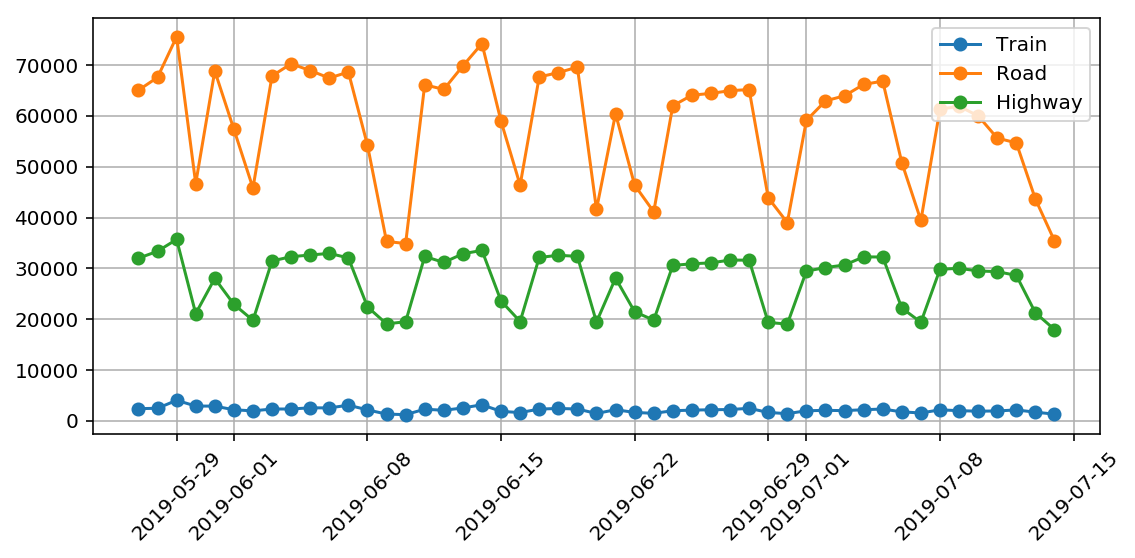

In [63]:
ds = dfs['tripcount_hourly_incomingfrom']
ds['day'] = ds.index.date
fig, ax1 = plt.subplots(1,1, figsize=(8,4))
ds.groupby('day').sum()[['Train', 'Road', 'Highway']].plot(ax=ax1, marker='o',rot=45);
ax1.set_title("")
ax1.xaxis.set_label_text("");
ax1.yaxis.set_label_text("");
ax1.legend(frameon=True);
ax1.grid(True)
plt.tight_layout();
plt.savefig("incoming.png");

In [68]:
ds = dfs['tripcount_hourly_all']
ds['date'] = ds.index.date
ds['hour'] = ds.index.hour
ds.to_csv("../../analysis/people_total.csv")

In [69]:
ds

,Total,Train,Road,Highway,Commute,Non-commute,date,hour
Date,,,,,,,,
2019-05-27 00:00:00,2721,41,1518,1161,225,2495,2019-05-27,0
2019-05-27 01:00:00,1153,20,604,535,107,1046,2019-05-27,1
2019-05-27 02:00:00,771,20,357,402,67,703,2019-05-27,2
2019-05-27 03:00:00,670,20,289,374,98,572,2019-05-27,3
2019-05-27 04:00:00,1588,20,734,834,339,1248,2019-05-27,4
2019-05-27 05:00:00,5596,249,2876,2470,1803,3792,2019-05-27,5
2019-05-27 06:00:00,18024,696,10957,6370,7704,10320,2019-05-27,6
2019-05-27 07:00:00,33528,950,22783,9794,17807,15721,2019-05-27,7
2019-05-27 08:00:00,30195,938,20540,8716,13176,17019,2019-05-27,8
